In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn import svm

import pandas as pd
from helper import get_news_dataset, get_data, create_classes

pd.options.display.max_columns = None

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression

#Encoding schtuff
from sklearn import preprocessing
from sklearn import utils


# Preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from math import sqrt


## Import Dataset

In [2]:
DATA_SET_URL = ["https://www.dropbox.com/sh/euppz607r6gsen2/AACYNkq6O4UEjacsBy6FhT6La/Wine%20Quality%20Ratings%20and%20Chemicals?dl=1"]
DATA_SET = "./data/winequality-white.csv"

## Load Dataset

In [3]:
get_data(DATA_SET_URL)
data = pd.read_csv(DATA_SET, delimiter=";")
# data = pd.read_csv(data_path, error_bad_lines=False, encoding="ISO-8859-1") 
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6


## Understanding the data

#### Correlation of Features

In [4]:
def plot_pearson_correlation_of_features(train):
    colormap = plt.cm.viridis
    plt.figure(figsize=(14,12))
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    sns.heatmap(train.astype(float).corr(),linewidths=0.5,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

In [5]:
def plot_correlation_features_against_target(train, target):
    for column in train:
        color = np.random.rand(3,)
        plt.scatter(train[column], train[target], color=color)
        plt.title(column + " against " + target)
        plt.xlabel(column)
        plt.ylabel(target)
        plt.show()

In [21]:
def plot_2d_label_classification(train, target):

    groups = train.groupby(target)

    # Plot
    fig, ax = plt.subplots()
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    for name, group in groups:
        print(group)
        ax.plot(group[group.columns[0]], group[group.columns[1]], marker='o', linestyle='', ms=12, label=name)
    ax.legend()

    plt.show()

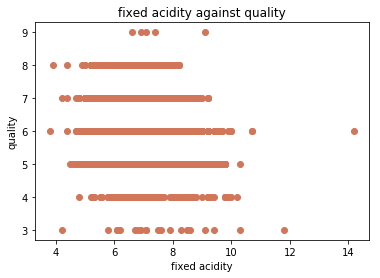

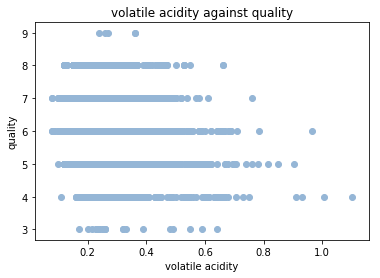

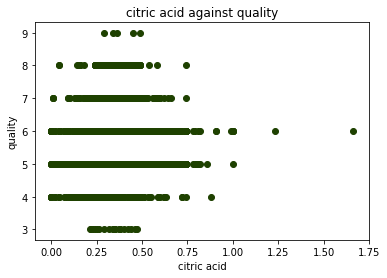

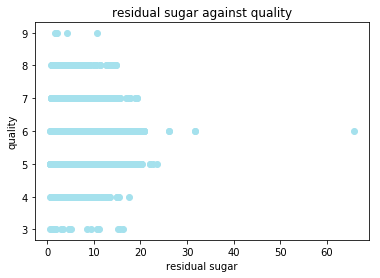

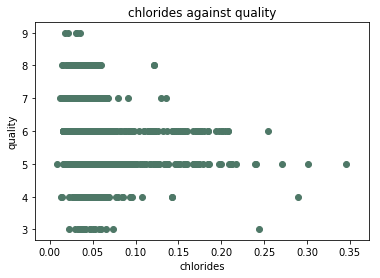

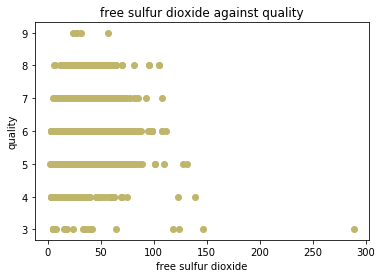

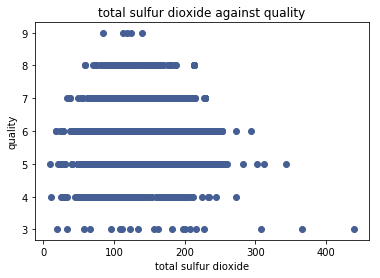

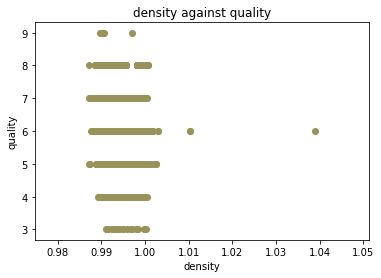

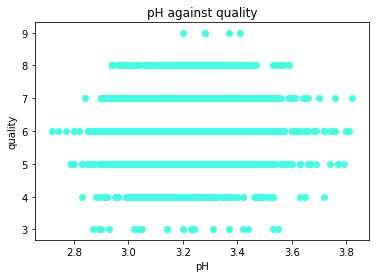

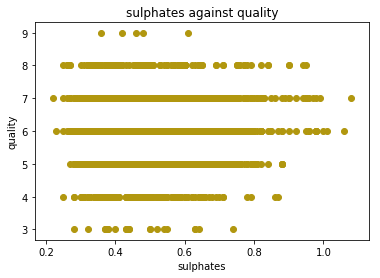

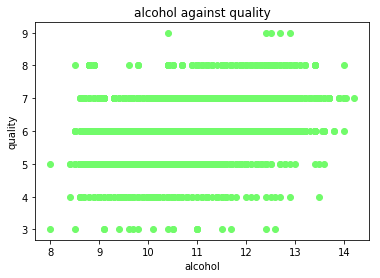

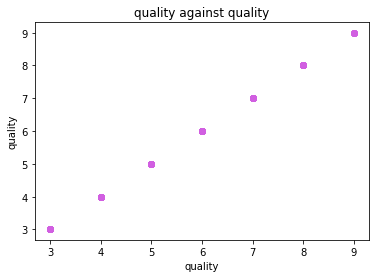

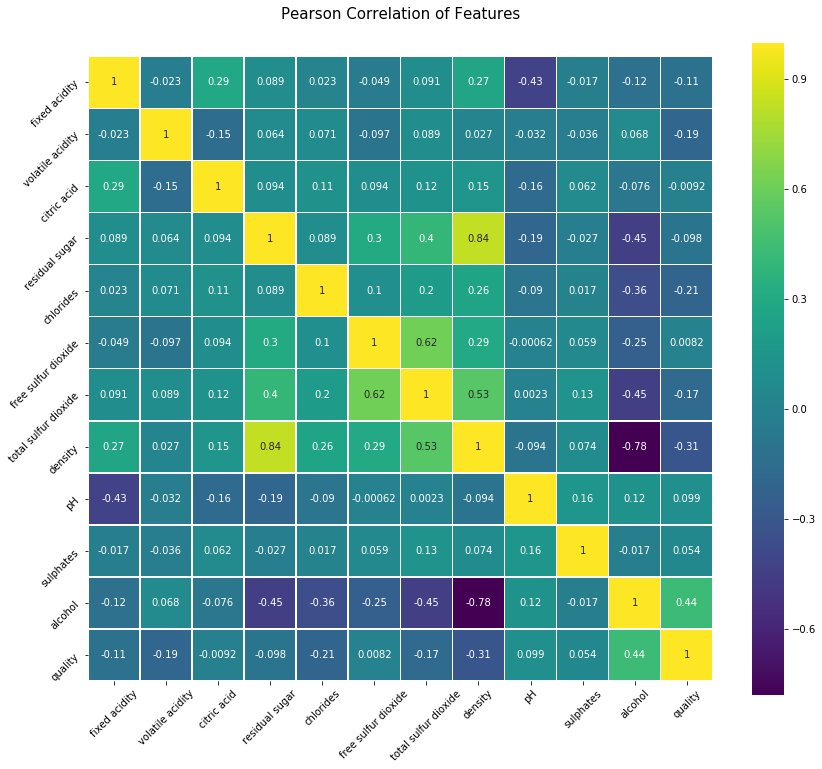

In [22]:
plot_correlation_features_against_target(data, "quality")
plot_pearson_correlation_of_features(data)

##### - By Simply looking into the data visualisation, we can see no feature has a strong correlation with the wine quality, hence it is impossible to give a good accurate prediction with any of these features alone.
##### - We believe this is due to the fact that the quality of wine is dependant on the balancing between two or more features. We will now start to investigate how the combination of features will effect the quality of wine. To do that, we will use Principla Component Analysis to perform feature extraction on the dataset. It helps us to extract the features characteristics of the dataset
##### - To make the visualisation simplier, I will categorize the wine quality into 3 categories - bad, pass, good.
##### Where bad -> 3-4, pass -> 5 -7, good -> 8-9

###### Feature Sacling
Before we perform PCA, we need to perform feature sacling to the dataset

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_data = sc.fit_transform(data)

In [24]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(scaled_data[:-2])
explained_variance = pca.explained_variance_ratio_
explained_variance

array([ 0.27866595,  0.13222173])

In [25]:
pca_data

array([[ 3.54247505, -0.35659784],
       [-0.61398756,  0.28991127],
       [ 0.14051906, -1.167821  ],
       ..., 
       [-2.07717795,  0.32322408],
       [ 1.47861049,  0.40582085],
       [-0.75337641, -0.51062622]])

In [26]:
data_frame = pd.DataFrame(data=pca_data[0:,0:],    # values
             columns=[str(x) for x in explained_variance][0:])

quality = data['quality']

# quality[quality <= 4] = 0
# quality[quality <= 6] = 1
# quality[quality > 6] = 2

data_frame['quality'] = quality
data_frame
# plot_pearson_correlation_of_features(data)

,0.278665949657,0.132221732522,quality
0,3.542475,-0.356598,6
1,-0.613988,0.289911,6
2,0.140519,-1.167821,6
3,1.378754,0.199089,6
4,1.378754,0.199089,6
5,0.140519,-1.167821,6
6,0.074576,0.691715,6
7,3.542475,-0.356598,6
8,-0.613988,0.289911,6
9,-0.575661,-1.245072,6


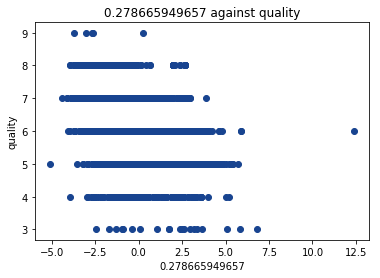

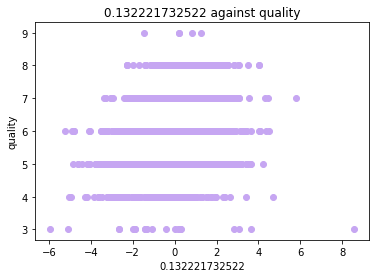

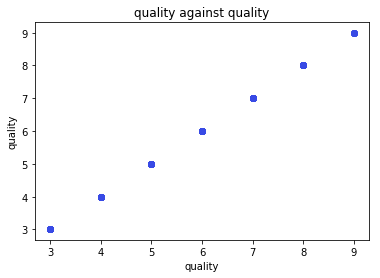

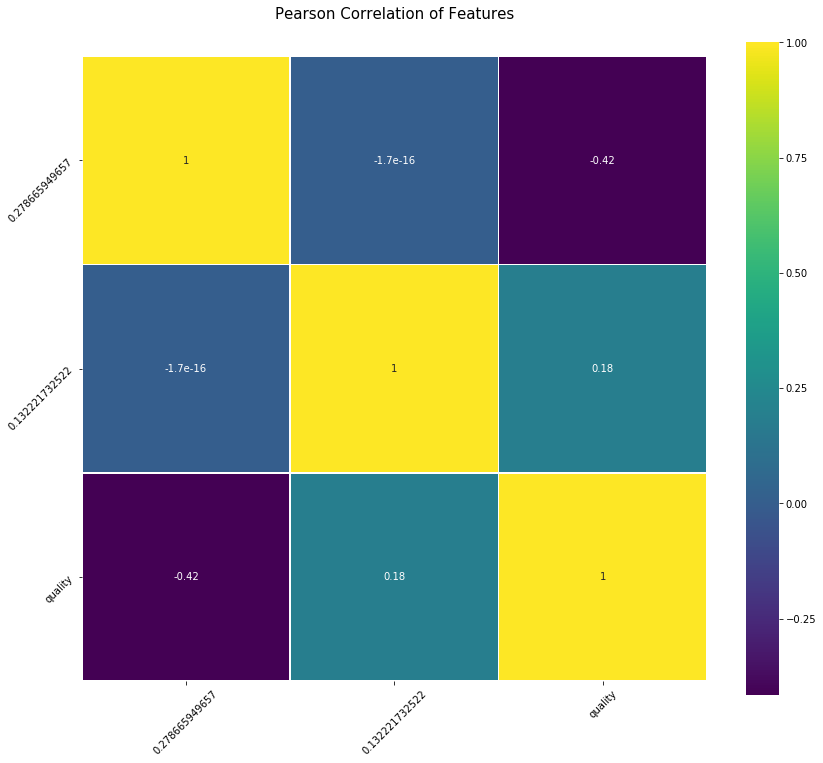

      0.278665949657  0.132221732522  quality
251         3.668730       -1.326301        3
253        -1.704770        0.303409        3
294         2.597533       -1.981921        3
445        -0.389029       -1.434203        3
740        -2.436396       -1.880372        3
873         0.056479       -5.950091        3
1034        5.813585       -1.916373        3
1229       -1.333141       -2.658152        3
1417        5.099928       -0.422672        3
1484        1.060180       -1.422264        3
1688        2.519473        3.653610        3
1931        3.193117        2.825530        3
2050        2.966176       -5.111883        3
2373       -0.879498       -2.661041        3
3087        1.744425        0.234911        3
3265        1.768063        3.062822        3
3307        3.334196       -1.104328        3
3409       -0.972273        0.005155        3
3810        2.369124        0.158588        3
4745        6.788974        8.555849        3
      0.278665949657  0.1322217325

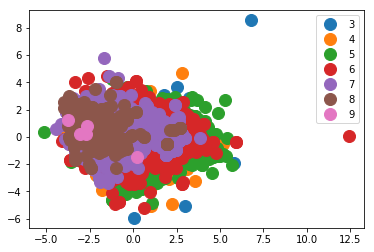

In [ ]:
plot_correlation_features_against_target(data_frame, "quality")
plot_pearson_correlation_of_features(data_frame)
plot_2d_label_classification(data_frame, "quality")

## Evaluation

In [ ]:
#Cross vailidation to estimate confidence intervals
#K-folds
data = np.asarray(data)
kf = KFold(n_splits = 2)
kf.get_n_splits(data)
print(kf)
for train_index, test_index in kf.split(data):
    print("TRAIN:", train_index, "TEST:", test_index)
    data_train = data[train_index]
    data_test = data[test_index]
    
    X_train, X_test, y_train, y_test = train_test_split(data_train, data_test, test_size=0.4, random_state=0)
    
    y_train = y_train[:,0]
    y_test = y_test[:,0]
    
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    
    lab_enc = preprocessing.LabelEncoder()
    encoded_Y = lab_enc.fit_transform(y_train)
    
    classifier = svm.SVC(kernel='linear', C=1).fit(X_train, encoded_Y)
    score = classifier.score(X_test, y_test)
    
    print(score)

KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [2449 2450 2451 ..., 4895 4896 4897] TEST: [   0    1    2 ..., 2446 2447 2448]
(1469, 12) (1469,)
(980, 12) (980,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data.describe()


In [ ]:
data.info()


In [ ]:
data

In [ ]:
# try and do filter and wrapper functions 